# **INTRODUCTION**

# **DEFINING OUR QUESTION**

Using data from the titanic shipwreck, build a model that predicts whether a passenger survived or not.



# **METRIC FOR SUCCESS**

Implementing a K-nearest neighbor (kNN) classifier on the provided dataset

# **UNDERSTANDING CONTEXT**

Implementing a K-nearest neighbor (kNN) classifier on the provided dataset.

i) Dataset1

The dataset1 has the following features: The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including:


survived

Age

passenger-class

sex

fare

Embarked

# **RECORDING EXPERIMENTAL DESIGN**

Load Data

Data Cleaning

Exploratory Data Analysis

Data Modelling

Model Evaluation

Model improvement and tuning

Conclusion

Challenging the solution

# **RELEVANCE OF DATA**

Data used in analysis was relevant for prediction

# **DATA LOADING**

# **Importing our libraries**

In [ ]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib
import scipy as sp
# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings('ignore')


import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [ ]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [ ]:
settings()

Populating the interactive namespace from numpy and matplotlib


# **Loading Data**

In [ ]:
# reading the csv file

test =pd.read_csv('test.csv')


In [ ]:
# reading the csv file

train =pd.read_csv('train.csv')

In [ ]:
#checking our dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#checking our dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#
# Previewing the bottom of our dataset
#
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#
# Previewing the bottom of our dataset
#
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Checking information about our dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Checking information about our dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#checking the shape for the datasets
train.shape,test.shape

((891, 12), (418, 11))

In [ ]:
#Checking our columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Checking our columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **DATA CLEANING**

In [ ]:
#Setting passengerID as index in train dataset
train.set_index('PassengerId',inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Setting passengerID as index in test dataset
test.set_index('PassengerId',inplace=True)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Drop columns that aren't useful in our analysis:
#- Name: Acts a unique identifier for each passenger and thus does not provide information about the passenger
#- 
#- Ticket: Similar to passenger id and name
#- Cabin: Has 77% missing values

to_drop = ['Name', 'Ticket','Cabin']
train.drop(to_drop, axis=1, inplace=True)

In [ ]:
test_drop = ['Name', 'Ticket','Cabin']
test.drop(test_drop, axis=1, inplace=True)

In [ ]:
#Checking for null values in train dataset
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
#Checking for null values in test dataset
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
#Dealing with null vakues in train dataset
#MODE IMPUTATION
cols = ['Age','Embarked','Fare' ]

train[cols]=train[cols].fillna(train.mode().iloc[0])

In [ ]:
#Dealing with null values in train
#MODE IMPUTATION
cols = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

test[cols]=test[cols].fillna(test.mode().iloc[0])

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#Checking for duplicates 
train.duplicated().sum()

116

In [ ]:
#Checking for duplicates 
test.duplicated().sum()

43

In [ ]:

#dropping duplicates
train.drop_duplicates(inplace = True)

In [ ]:
#dropping duplicates
test.drop_duplicates(inplace = True)

In [ ]:
#Converting columns to lowercase
train.columns = train.columns.str.strip().str.lower()
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [ ]:
#Converting columns to lowercase
test.columns = test.columns.str.strip().str.lower()
test.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [ ]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


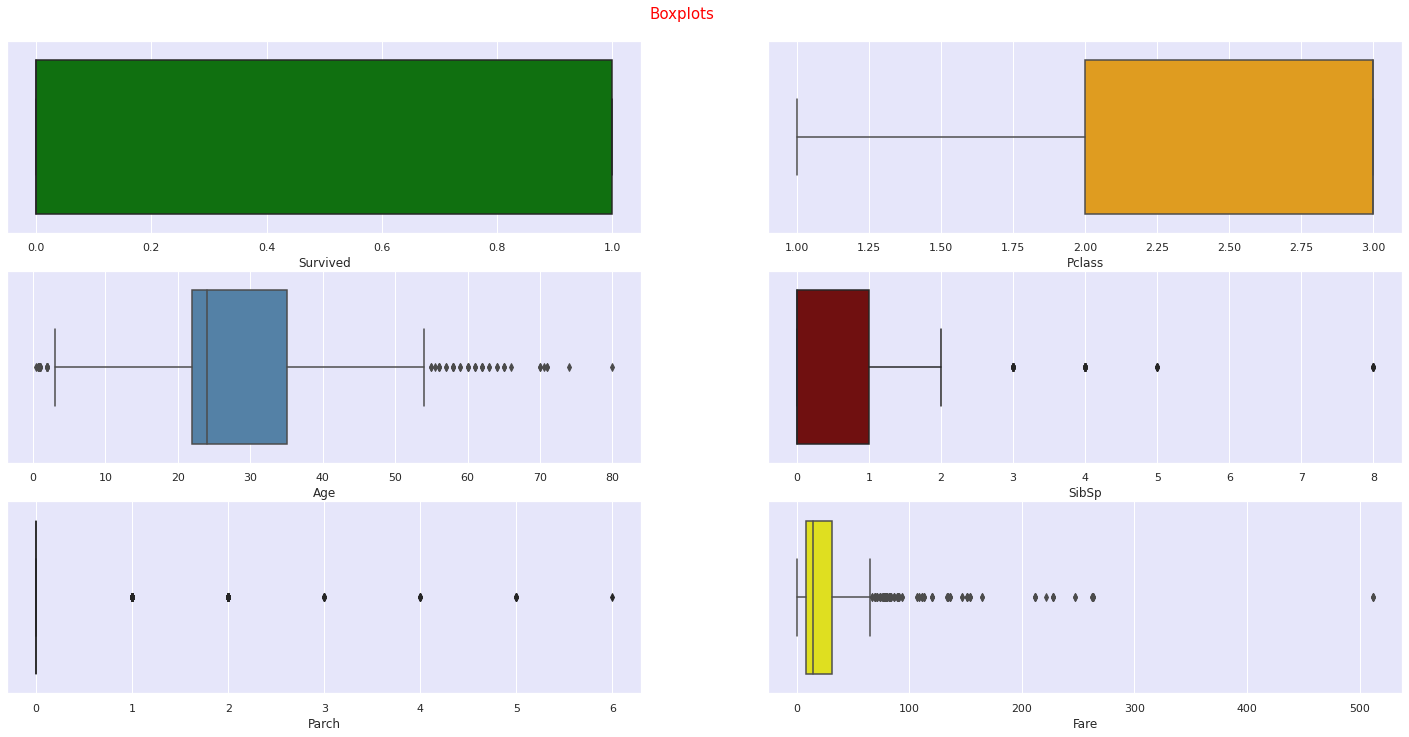

In [ ]:
# Creating a list of columns to check for outliers in train dataset
# Creating a list of colors
#
col_list = ['Survived','Pclass','Age','SibSp','Parch','Fare']
colors = ['green','orange','steelblue','maroon','purple','yellow']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2)
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), train, col_list, colors):
  sns.boxplot(train[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

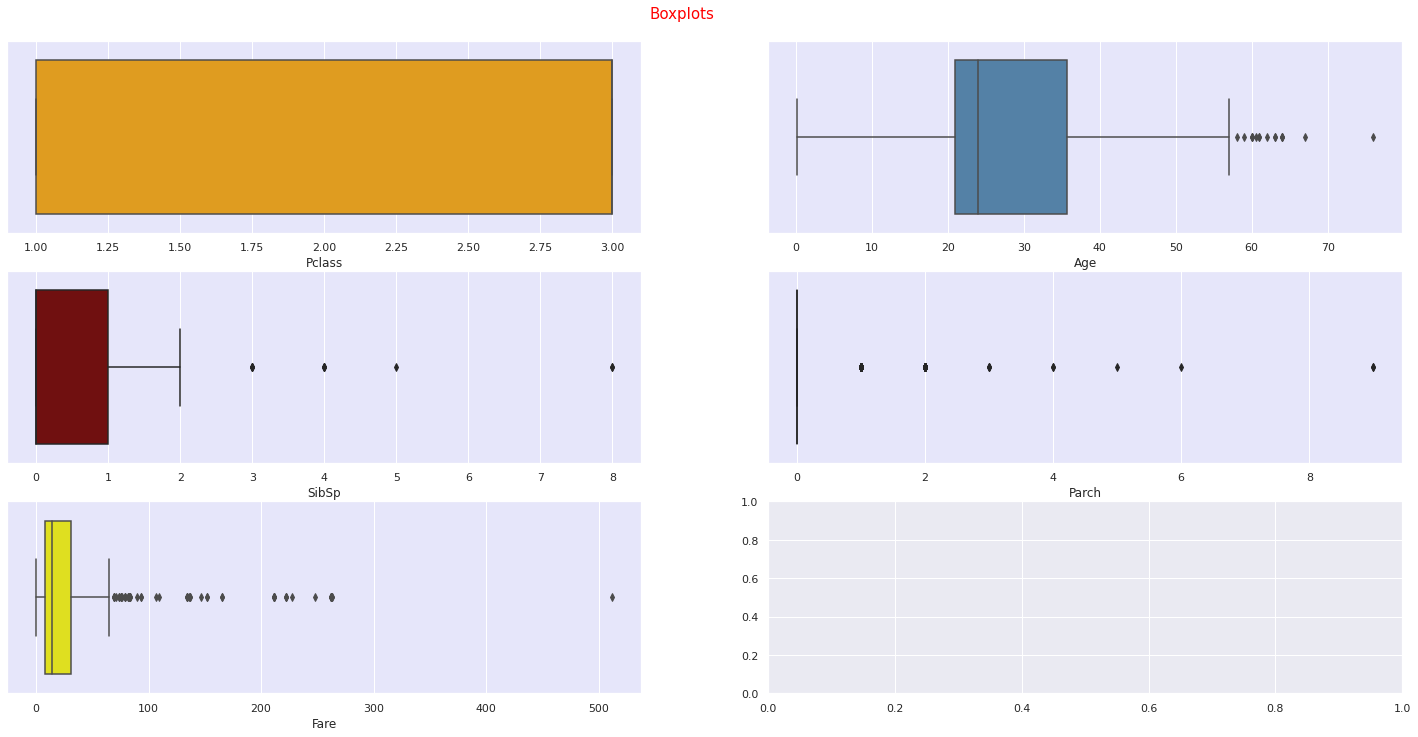

In [ ]:
# Creating a list of columns to check for outliers in test dataset
# Creating a list of colors
#
col_list = ['Pclass','Age','SibSp','Parch','Fare']
colors = ['orange','steelblue','maroon','purple','yellow']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2)
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), test, col_list, colors):
  sns.boxplot(test[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

1)Passengers who paid roughly above 68 are considered outliers, however according to this article higher priced tickets were available



In [ ]:
#saving our clean dataset
train.to_csv('clean-train',index=False)
#saving our clean dataset
test.to_csv('clean-test',index=False)

# **Descriptive Data analysis**

In [ ]:
#general statistical summaries of the numerical variables
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.415484,2.241290,29.070219,0.527742,0.420645,34.991107
std,0.493124,0.855049,13.889409,0.990363,0.840565,52.392205
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,16.100000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#general statistical summaries of the numerical variables
test.describe()

,pclass,age,sibsp,parch,fare
count,375.000000,375.000000,375.000000,375.000000,375.000000
mean,2.208000,29.006667,0.490667,0.437333,38.477389
std,0.852452,13.705260,0.930352,1.026751,58.244651
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.987500
50%,2.000000,25.000000,0.000000,0.000000,15.500000
75%,3.000000,36.750000,1.000000,0.500000,38.002100
max,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0.5, 1.0, 'Passenger Age distribution')

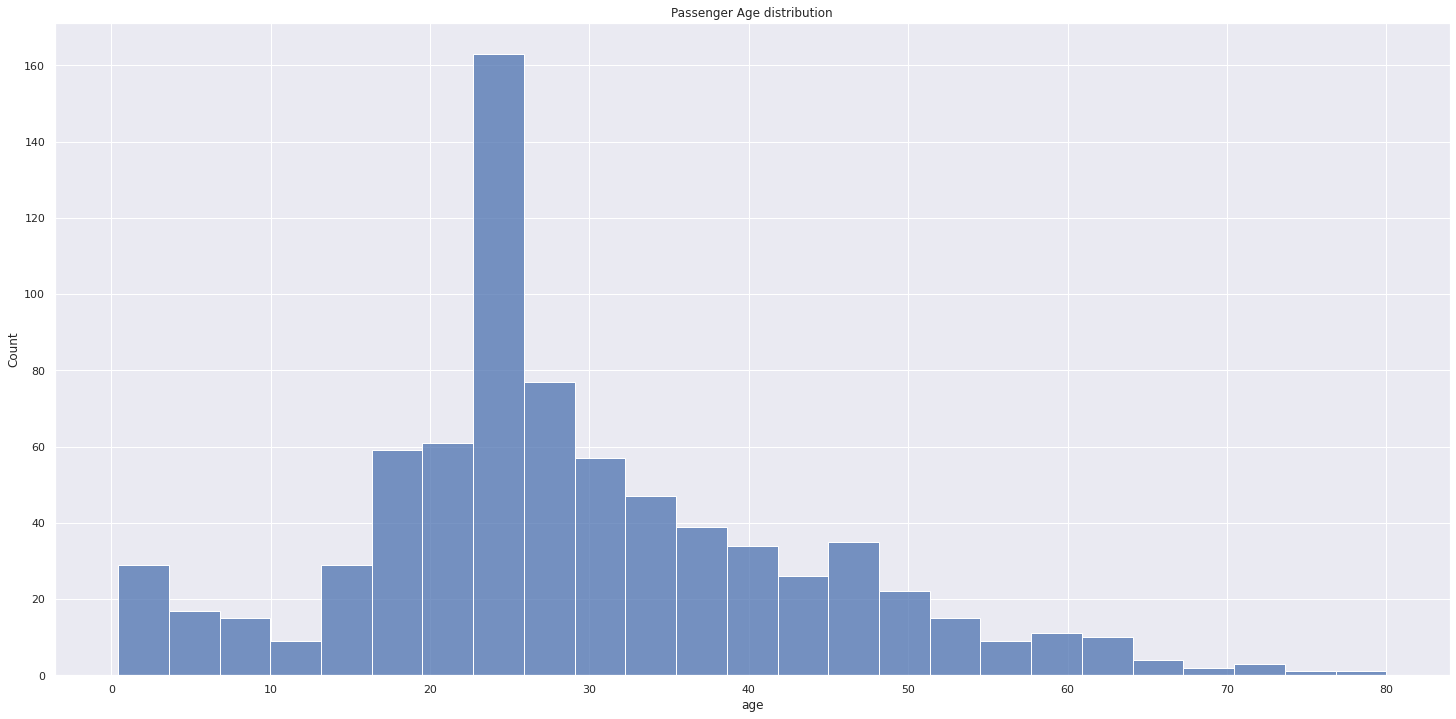

In [ ]:
sns.histplot(train.age)
plt.title('Passenger Age distribution')

Text(0.5, 1.0, 'Passenger Age distribution')

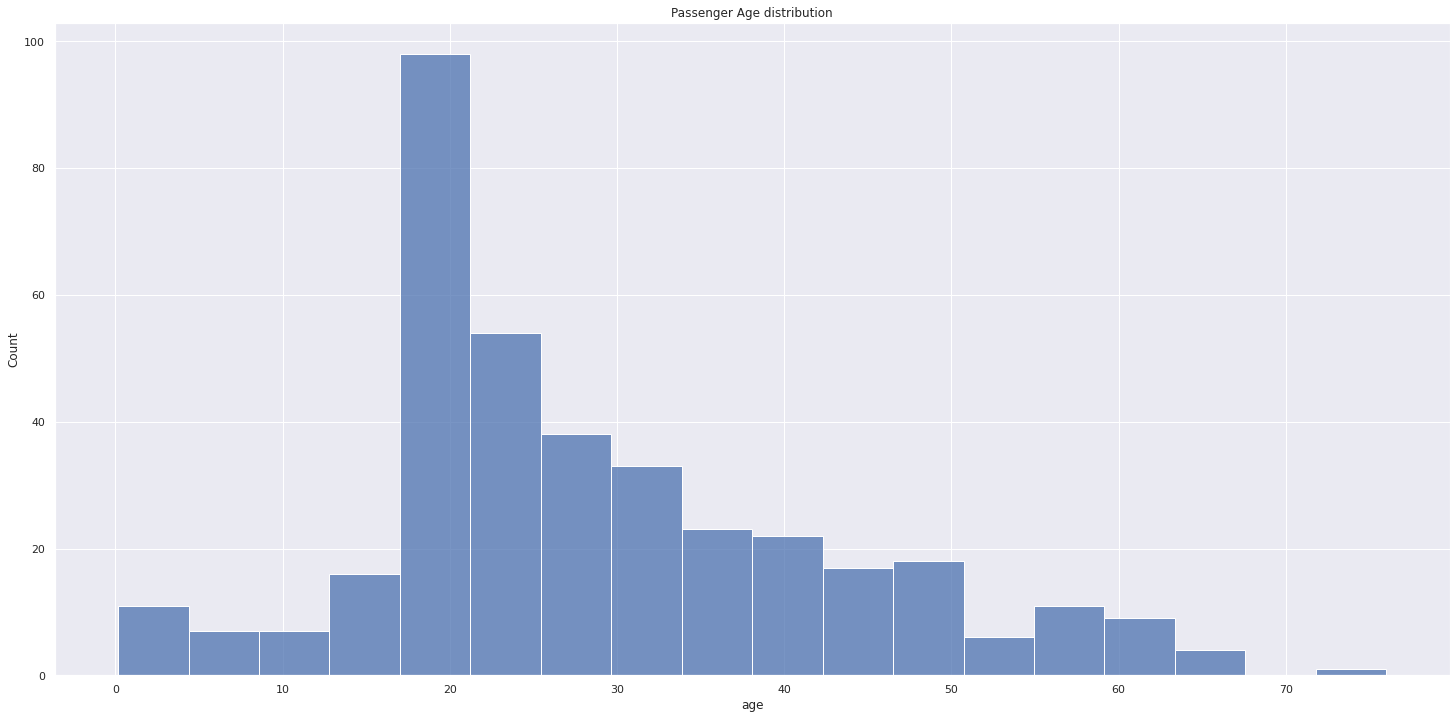

In [ ]:
sns.histplot(test.age)
plt.title('Passenger Age distribution')

Age column is relatively normally distributed therefore age is an adequate central tendency measure

In [ ]:
# Investigate the Parch column
train.parch.value_counts()

0    571
1    114
2     75
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

Despite most passengers having 0 or 1 parents/children on board, having 3, 4, 5 or 6 children/parents on board is perfectly reasonable.

Text(0, 0.5, 'Survived')

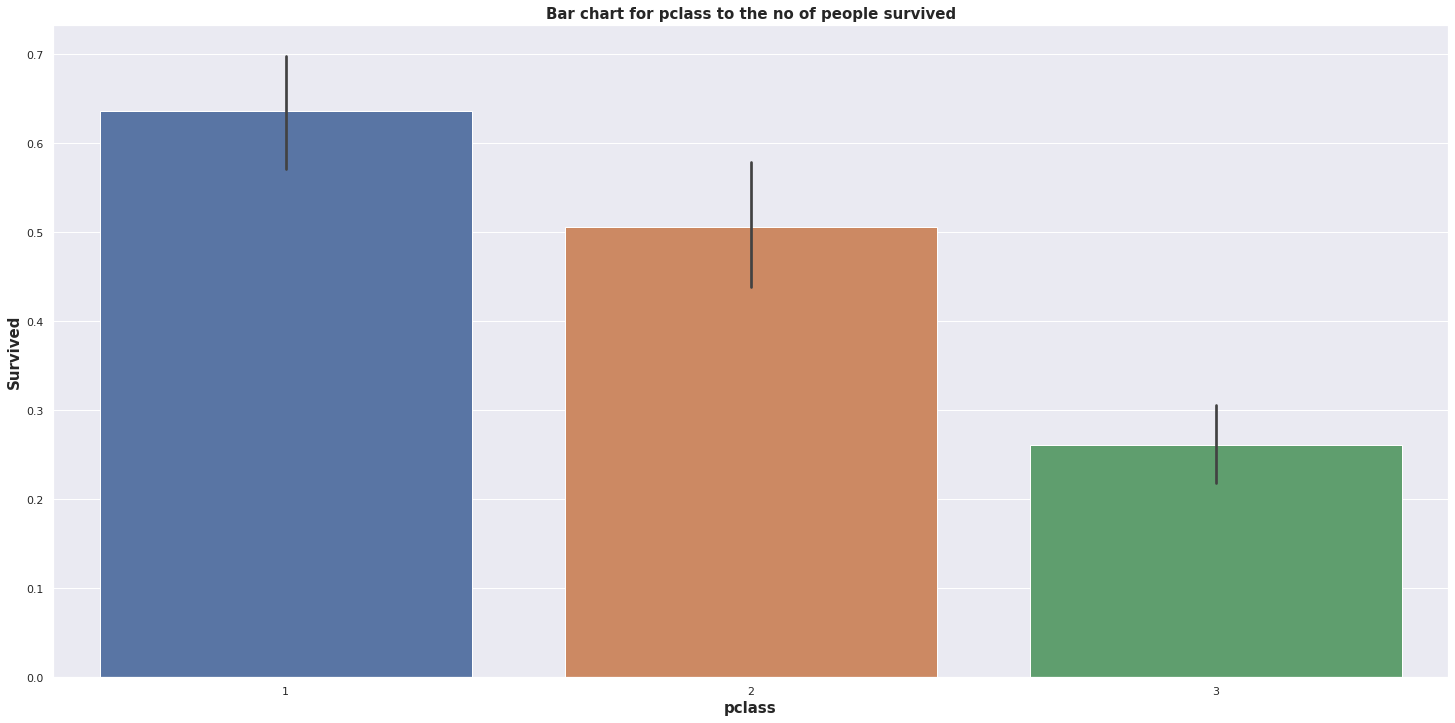

In [ ]:
#Bar chart for pclass to survived
plt.figure()
ax = sns.barplot(x="pclass", y="survived", data=train)
plt.title('Bar chart for pclass to the no of people survived', fontweight='bold',fontsize=15)
plt.xlabel('pclass',fontweight='bold',fontsize=15)
plt.ylabel('Survived',fontweight='bold',fontsize=15)

Text(0, 0.5, 'Embarked')

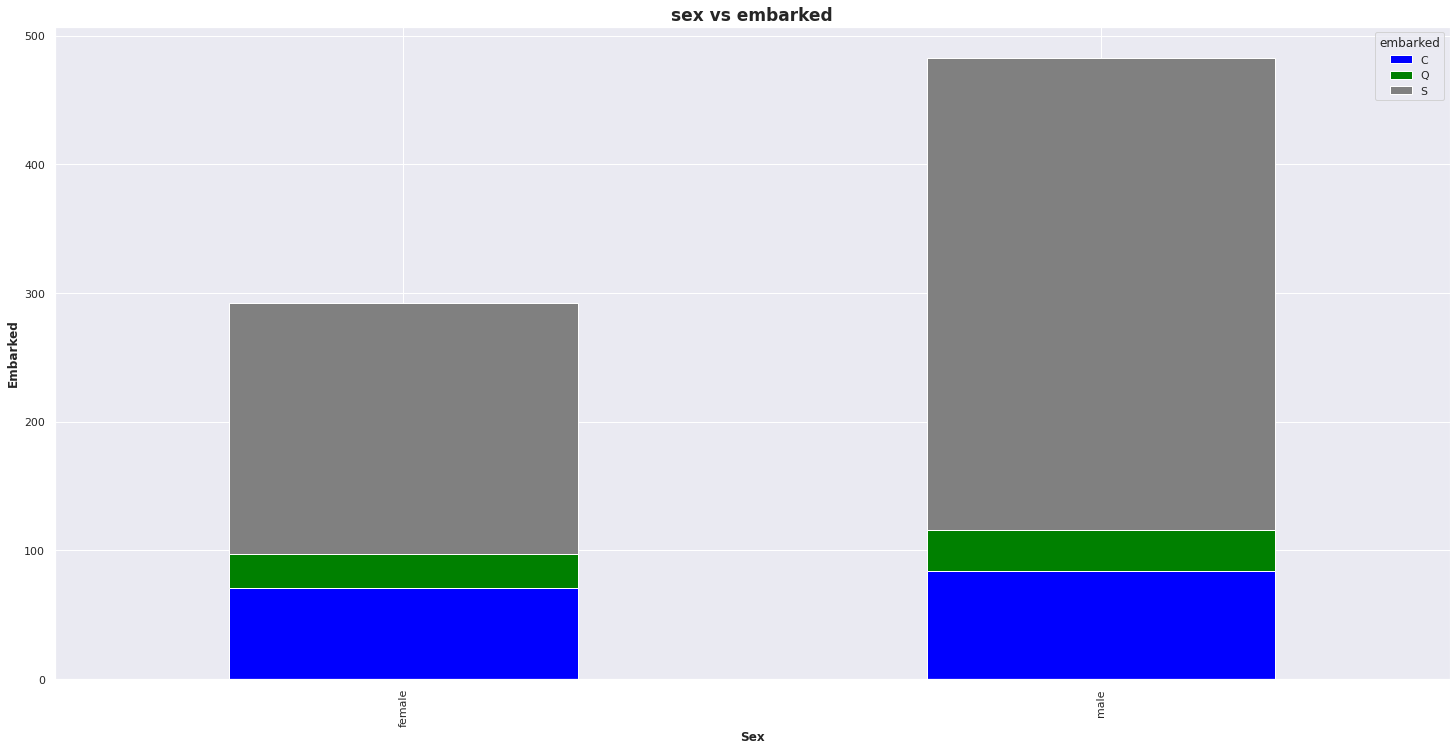

In [ ]:
#Stacked bar chart of weekday with day type
pd.crosstab(train['sex'],train['embarked']).plot(kind="bar",stacked=True, color=['blue','green','grey'])
plt.title('sex vs embarked', fontweight='bold', fontsize=17)
plt.xlabel('Sex', fontweight='bold', fontsize=12)
plt.ylabel('Embarked', fontweight='bold', fontsize=12)

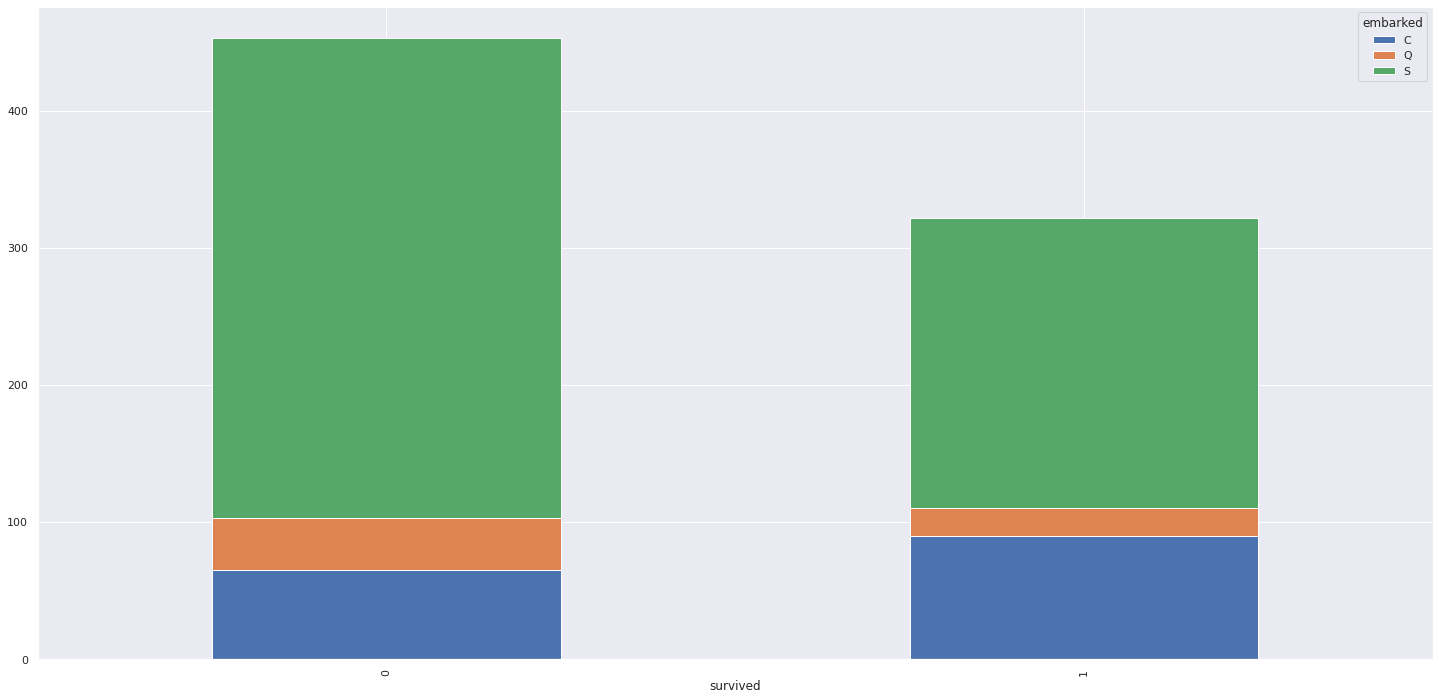

In [ ]:
pd.crosstab(train.survived, train.embarked).plot(kind='bar',stacked=True)

A larger percentage of passengers from Cherbourg survived as opposed to passengers from Southamption and Queenstown.

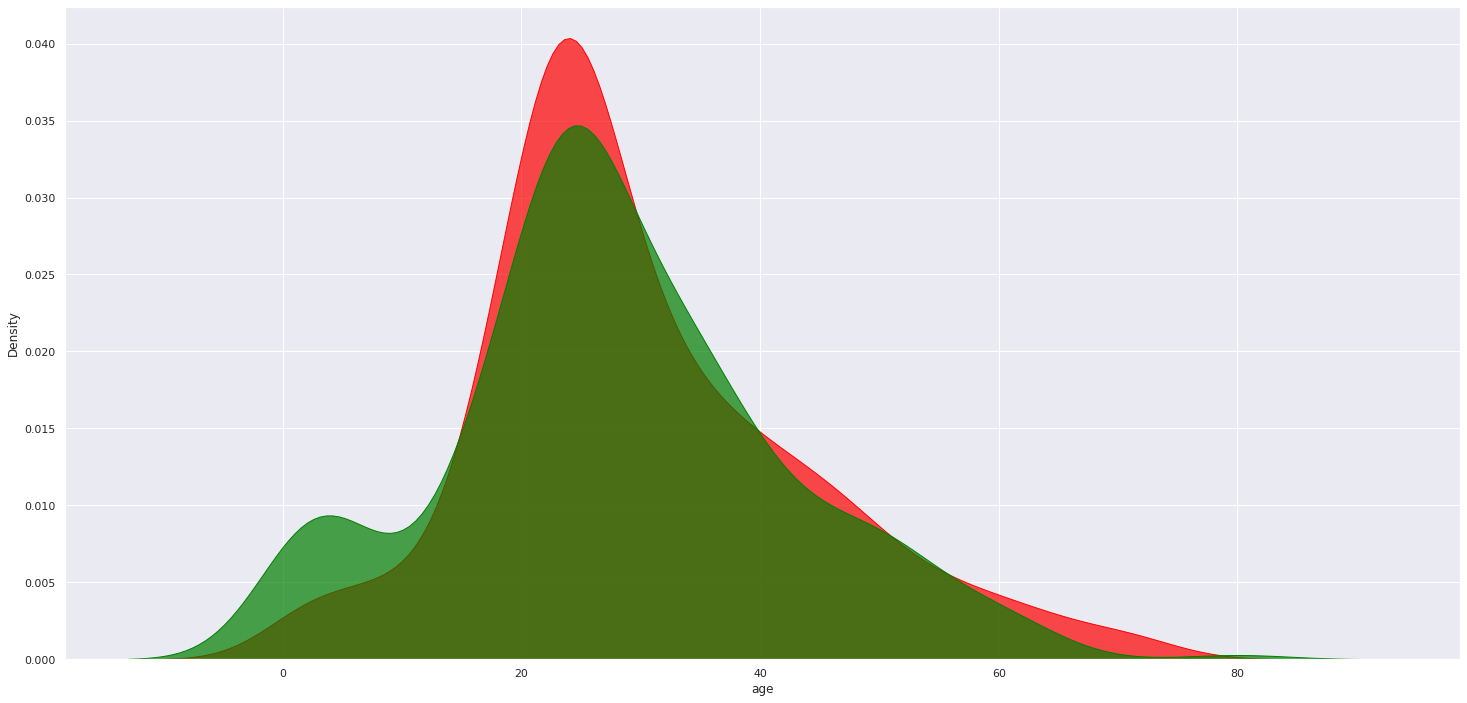

In [ ]:
# Age distribution among passengers who perished and those who survived.
sns.kdeplot(train.loc[train.survived == 0, 'age'], shade=True, color="red", label="Perished", alpha=.7)
sns.kdeplot(train.loc[train.survived == 1, 'age'], shade=True, color="green", label="Survived", alpha=.7)

Age distributions between passengers who survived and those who didn't are pretty similar. However a larger percentage of younger passengers survived.

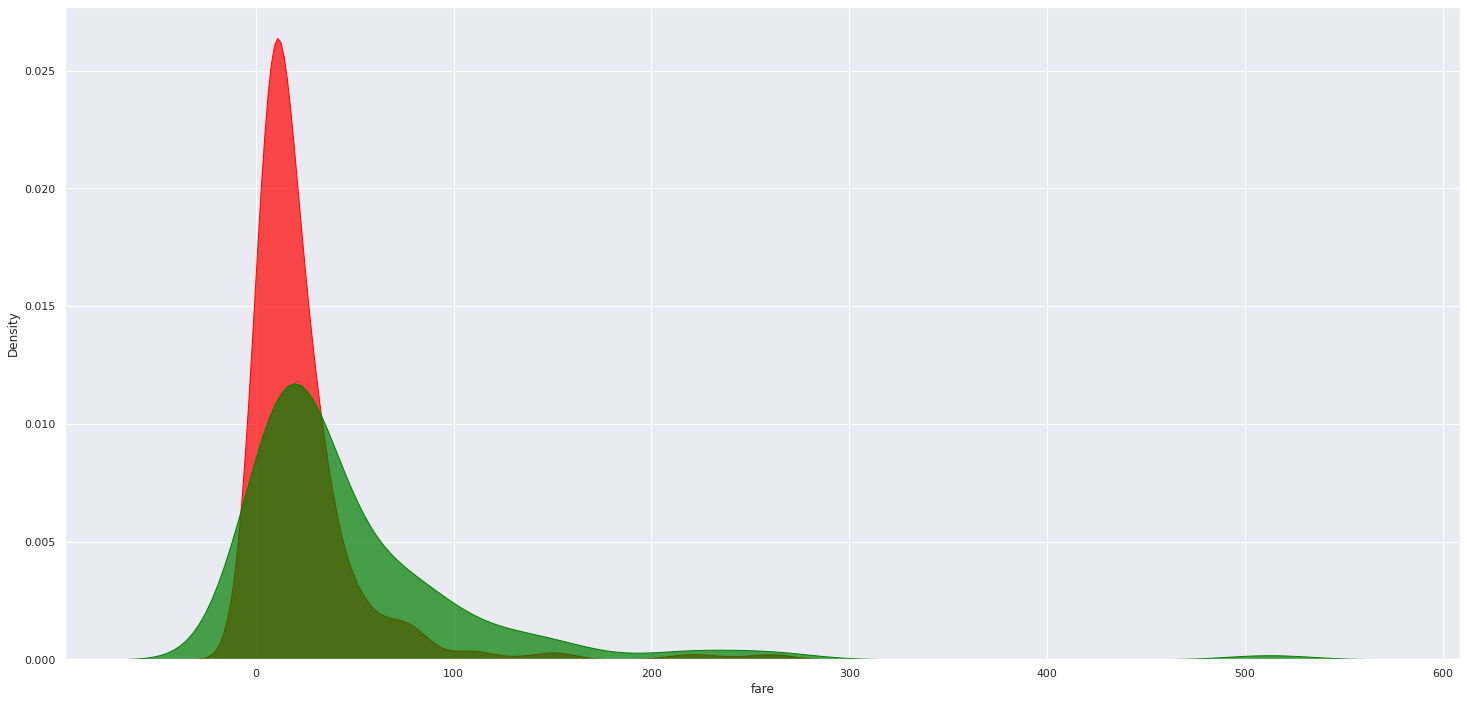

In [ ]:
# Fare distribution among passengers who perished and those who survived.
sns.kdeplot(train.loc[train.survived == 0, 'fare'], shade=True, color="red", label="Perished", alpha=.7)
sns.kdeplot(train.loc[train.survived == 1, 'fare'], shade=True, color="green", label="Survived", alpha=.7)

Passengers who perished are constricted mostly to fare prices between 0 and 100, most of the passengers who paid higher fares survived

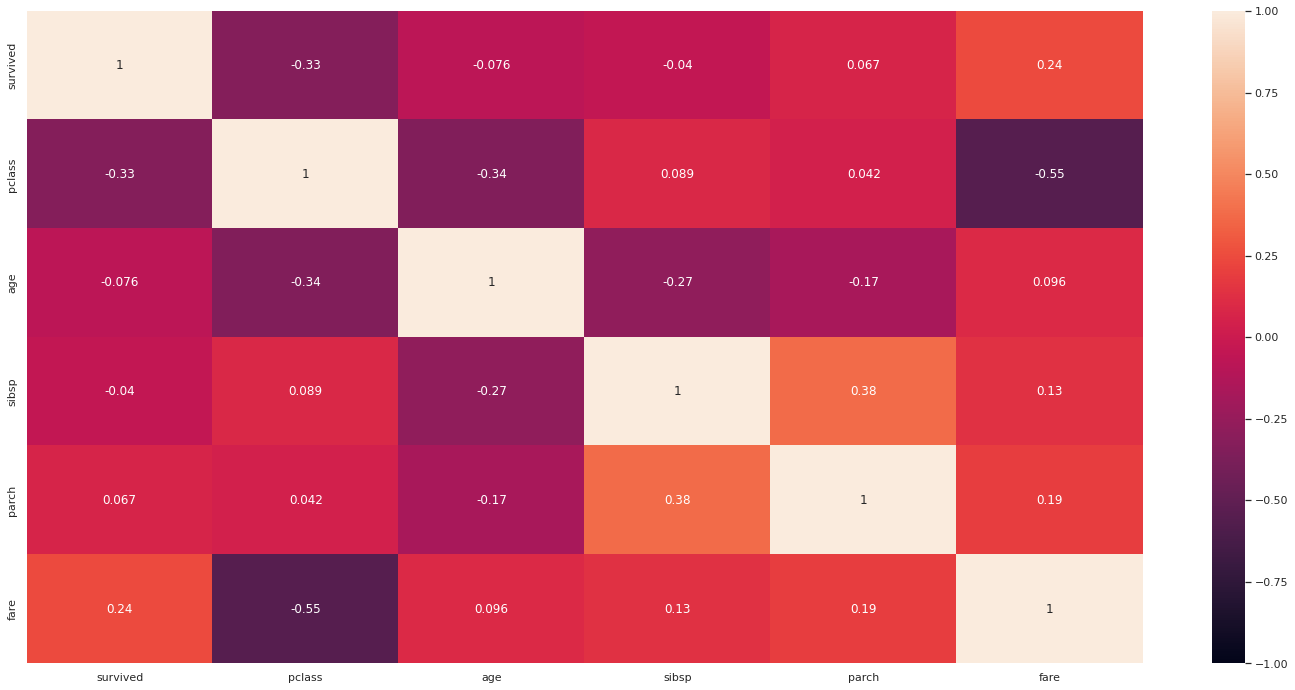

In [ ]:
# Determine correlation between features
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)

As expected there is a strong negative correlation between passenger class and fare. Passengers of upper and middle classes have higher price tickets.

# **DATA MODELLING**

In [ ]:
# Encode sex and embarked features
train['sex'] = train.sex.map({'male':0, 'female':1})
train['embarked'] = train.embarked.map({'C':0,'S':1,'Q':2})

In [ ]:
# Split data into train and test sets
X = train.drop(['survived'],axis=1)
Y = train['survived']

# Stratify Y variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=23, stratify = Y)

In [ ]:
# Perform linear discriminant analysis on data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(x_train, y_train)

lda.explained_variance_ratio_

array([1.])

In [ ]:
# The first discriminant explains 100% variance in our data. Attempt to classify survival rate with lda
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

lda_pred = lda.predict(x_test)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       136
           1       0.69      0.63      0.66        97

    accuracy                           0.73       233
   macro avg       0.72      0.71      0.71       233
weighted avg       0.72      0.73      0.72       233




Our LDA classifier has an overall accuracy of 73%. Recall and precison scores for the Survived class are lower.

In [ ]:
# Get the roc_auc_scores due to the imbalance in our classes
print(roc_auc_score(y_test, lda.predict_proba(x_test)[:, 1]))

0.7957095209217708


The LDA classifier has a fairly high roc_auc score: 79% for our positive class.

In [ ]:
# Transform train and test features
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

In [ ]:
# Scale x train and x test with a standard scaler
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Create parameter grid and set up grid search

from sklearn.neighbors import KNeighborsClassifier
parameters = {
    'n_neighbors': np.arange(5, 11),
    'p':[1,2],
    'weights': ['uniform', 'distance'],
    'leaf_size': np.arange(20, 60, 10),
    'metric': ['euclidean','manhattan'],
    'algorithm': ['kd_tree','ball_tree','brute']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, scoring='roc_auc', cv=10)

In [ ]:
# Fit with scaled features and lda features
scaled_features = grid_knn.fit(x_train, y_train)
lda_features = grid_knn.fit(x_train_lda,y_train)

In [ ]:
print(f'Scaled X: {scaled_features.best_score_}\nLDA Transformed X: {lda_features.best_score_}')

Scaled X: 0.8559089315313019
LDA Transformed X: 0.8559089315313019


Similar performance between scaled features and lda transformed features.

In [ ]:
print(f'Scaled X: {scaled_features.best_params_}\nLDA Transformed X: {lda_features.best_params_}')

Scaled X: {'algorithm': 'brute', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
LDA Transformed X: {'algorithm': 'brute', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


In [ ]:
knn_lda =  KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree',leaf_size=20, metric='euclidean',p=1).fit(x_train_lda, y_train)
print(classification_report(y_test,knn_lda.predict(x_test_lda)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       136
           1       0.71      0.57      0.63        97

    accuracy                           0.73       233
   macro avg       0.72      0.70      0.71       233
weighted avg       0.72      0.73      0.72       233



In [ ]:
# Get the roc_auc_scores due to the imbalance in our classes
print(roc_auc_score(y_test, knn_lda.predict_proba(x_test_lda)[:, 1]))

0.7861582777440873


In [ ]:
# Get confusion matrix
matrix = confusion_matrix(y_test, knn_lda.predict(x_test_lda))
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,114,22
1,42,55


The KNN model fitted with LDA transformed data has an accuracy of 73% with higher false negatives than false positives.

In [ ]:
knn_scaled =  KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree',leaf_size=20, metric='euclidean',p=1).fit(x_train, y_train)
print(classification_report(y_test,knn_scaled.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       136
           1       0.75      0.59      0.66        97

    accuracy                           0.75       233
   macro avg       0.75      0.72      0.73       233
weighted avg       0.75      0.75      0.74       233



In [ ]:
# Get the roc_auc_scores due to the imbalance in our classes
print(roc_auc_score(y_test, knn_scaled.predict_proba(x_test)[:, 1]))

0.7942313523347484


In [ ]:
# Get confusion matrix
matrix = confusion_matrix(y_test, knn_scaled.predict(x_test))
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,117,19
1,40,57



The KNN model fitted with scaled data has an accuracy of 75% with higher false negatives than false positives.

In [ ]:
# Apply SMOTE to handle class imbalance
X = train.drop(['survived'],axis=1)
Y = train['survived']
from imblearn.over_sampling import SMOTE
# Apply smote to x and y
sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.4, random_state=23)

In [ ]:
# Scale x train and x test with a standard scaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

knn_scaled =  KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree',leaf_size=20, metric='euclidean',p=1).fit(x_train, y_train)
print(classification_report(y_test,knn_scaled.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       184
           1       0.79      0.74      0.76       179

    accuracy                           0.77       363
   macro avg       0.77      0.77      0.77       363
weighted avg       0.77      0.77      0.77       363



In [ ]:
# Get the roc_auc_scores due to the imbalance in our classes
print(roc_auc_score(y_test, knn_scaled.predict_proba(x_test)[:, 1]))

0.8579214233665291


Handling the class imbalance in our data does not improve the overall accuracy of the model, however there is increase in the roc_auc_score of our model to 85%

In [ ]:
# Try a different test size
X = train.drop(['survived'],axis=1)
Y = train['survived']

# Split data into train and test sets, use test size 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=72)

# Scale x train and x test with a standard scaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

knn_scaled =  KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree',leaf_size=20, metric='euclidean',p=1, weights='distance').fit(x_train, y_train)
print(classification_report(y_test,knn_scaled.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        81
           1       0.76      0.64      0.69        74

    accuracy                           0.73       155
   macro avg       0.73      0.72      0.72       155
weighted avg       0.73      0.73      0.73       155



In [ ]:
# Get the roc_auc_scores due to the imbalance in our classes
print(roc_auc_score(y_test, knn_scaled.predict_proba(x_test)[:, 1]))

0.7613446780113446


In [ ]:
# Get confusion matrix
matrix = confusion_matrix(y_test, knn_scaled.predict(x_test))
pd.DataFrame(matrix, columns=[0,1], index=[0,1])

,0,1
0,66,15
1,27,47


Overall accuracy: 73%

ROC_AUC_Score: 76%

# **Conclusion.**

# **Challenging the Solution**

a) Did we have the right question?

yes

b) Did we have the right data?

yes